# Data Understanding & Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import spacy
import warnings 
warnings.filterwarnings('ignore')

In [2]:
files = [
    'trustpilot_reviews_Avado.csv',
    'trustpilot_reviews_BPP.csv',
    'trustpilot_reviews_Coursera.csv',
    'trustpilot_reviews_Deloitte.csv',
    'trustpilot_reviews_DPG_plc.csv',
    'trustpilot_reviews_edx.csv',
    'trustpilot_reviews_Firebrand_Training.csv',
    'trustpilot_reviews_FutureLearn.csv',
    'trustpilot_reviews_General_Assembly.csv',
    'trustpilot_reviews_ICS_Learn.csv',
    'trustpilot_reviews_LearnDirect.csv',
    'trustpilot_reviews_Linkedin_Learning.csv',
    'trustpilot_reviews_PluralSight.csv',
    'trustpilot_reviews_QA_ltd.csv',
    'trustpilot_reviews_Udacity.csv',
    'trustpilot_reviews_Udemy.csv',
    'trustpilot_reviews_Whitehat_Jr.csv'
]

Gather all feedback into one dataframe.

In [3]:
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv('../Dataset/competitors/{}'.format(file))
    df = df.append(df_temp, ignore_index=True)

In [4]:
df.head()

,Unnamed: 0,@type,datePublished,headline,inLanguage,reviewBody,author_@type,author_image,author_name,author_url,itemReviewed_@type,itemReviewed_name,publisher_@type,publisher_name,publisher_sameAs,reviewRating_@type,reviewRating_ratingValue
0,0,Review,2021-06-15T02:22:01+00:00,Thanks again to Andre for your prompt…,en,Thanks again to Andre for your prompt follow-u...,Person,NaN,Adeline See,https://uk.trustpilot.com/users/60b9a55d85fa3f...,Thing,Avado,Organization,Trustpilot,https://uk.trustpilot.com,Rating,4
1,1,Review,2021-06-07T20:17:54+00:00,Very disappointed,en,"Very disappointed, I planned on taking this to...",Person,NaN,Master Fury,https://uk.trustpilot.com/users/60be7eebf66049...,Thing,Avado,Organization,Trustpilot,https://uk.trustpilot.com,Rating,1
2,2,Review,2021-06-02T15:37:44+00:00,Great customer care!,en,Great customer care!,Person,NaN,Nate Rowlan,https://uk.trustpilot.com/users/60b7a5c8b5cea8...,Thing,Avado,Organization,Trustpilot,https://uk.trustpilot.com,Rating,5
3,3,Review,2021-06-01T16:16:19+00:00,Very helpful with queries and issues,en,Very helpful with queries and issues. The res...,Person,NaN,Joanne Murgatroyd,https://uk.trustpilot.com/users/5fff4a50410db1...,Thing,Avado,Organization,Trustpilot,https://uk.trustpilot.com,Rating,5
4,4,Review,2021-06-01T09:16:57+00:00,about amending system error,en,Dear Mr. Andre\nThank you very much settle for...,Person,NaN,Miyoko Phua,https://uk.trustpilot.com/users/60b5fafcadeb93...,Thing,Avado,Organization,Trustpilot,https://uk.trustpilot.com,Rating,5


## 1. Data Understanding

### 1.1. Describe Data

Describe the data that has been acquired, including the format of the data, the quantity of data (for
example, the number of records and fields in each table), the identities of the fields, and any other surface
features which have been discovered. Evaluate whether the data acquired satisfies the relevant requirements.

In [5]:
df.shape

(20380, 17)

The data is formatted as a csv file with 20380 rows(observations) and 17 columns(features).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20380 entries, 0 to 20379
Data columns (total 17 columns):
Unnamed: 0                  20380 non-null int64
@type                       20380 non-null object
datePublished               20380 non-null object
headline                    20380 non-null object
inLanguage                  20380 non-null object
reviewBody                  20380 non-null object
author_@type                20380 non-null object
author_image                2751 non-null object
author_name                 20379 non-null object
author_url                  20380 non-null object
itemReviewed_@type          20380 non-null object
itemReviewed_name           20380 non-null object
publisher_@type             20380 non-null object
publisher_name              20380 non-null object
publisher_sameAs            20380 non-null object
reviewRating_@type          20380 non-null object
reviewRating_ratingValue    20380 non-null int64
dtypes: int64(2), object(15)
memory usage: 2

In [7]:
df.nunique()

Unnamed: 0                   6464
@type                           1
datePublished               20361
headline                    17206
inLanguage                      1
reviewBody                  20221
author_@type                    1
author_image                 2742
author_name                 16452
author_url                  20344
itemReviewed_@type              1
itemReviewed_name              17
publisher_@type                 1
publisher_name                  1
publisher_sameAs                1
reviewRating_@type              1
reviewRating_ratingValue        5
dtype: int64

Initially, the features are as follow:
- Unnamed: 0: integer. Auto-generated index from scraping process.
- @type: string. The type of data/information in the review HTML block, which is 'Review'.
- datePublished: string. The date and time the review was published/submitted.
- headline: string. The head/summary of the review.
- inLanguage: string. The detected language used in the review.
- reviewBody: string. The body of the review.
- author_@type: string. The type of data/information in the author HTML block, which is 'Person'.
- author_image: string. The profile picture image of the author of the review, given as a URL to the image.
- author_name: string. The name of the author.
- author_url: string. The URL to the author Trustpilot profile.
- itemReviewed_@type: string. The type of data/information in the target company HTML block, which is 'Thing'.
- itemReviewed_name: string. The name of the target company.
- publisher_@type: string. The type of data/information in the publisher HTML block, which is 'Organization'.
- publisher_name: string. The name of the publisher, in this case is 'Trustpilot'.
- publisher_sameAs: string. The URL to the publisher, in this case is 'https://uk.trustpilot.com'.
- reviewRating_@type: string. The type of data/information in the ratings HTML block, which is 'Rating'.
- reviewRating_ratingValue: integer. The number of ratings given to the reviews with range between 1 and 5 inclusive.

For columns with '@type' in it, the value of each of the column is the same. For example, column 'author_@type' has only one value 'Person' for the whole dataset. Other than this, the columns 'publisher_name' and 'publisher_sameAs' have the same value for the whole dataset as well because in this case, the publisher is only 'Trustpilot'.

The dataset fulfills the requirements needed for this project with focus on columns 'headline', 'reviewBody', and 'reviewRating_ratingValue', which make up a complete customer feedback.

### 1.2. Explore Data

Describe results of this task, including first findings or initial hypothesis and their impact on the remainder
of the project. If appropriate, include graphs and plots to indicate data characteristics that suggest further
examination of interesting data subsets.

Text(0.5, 0, 'Ratings')

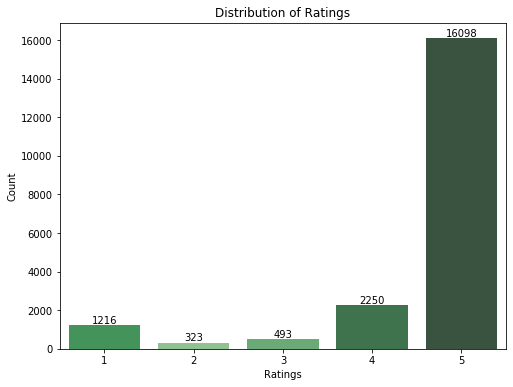

In [8]:
# Ratings count
f, ax = plt.subplots(figsize=(8,6))

groupedvalues=df.groupby('reviewRating_ratingValue').count().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
pal.reverse()
rank = groupedvalues["Unnamed: 0"].argsort().argsort() 

g = sns.countplot(data=df,
                   x="reviewRating_ratingValue", 
                   palette=np.array(pal[::-1])[rank],
                   ax=ax
                  )

for index, row in groupedvalues.iterrows():
    g.text(row.name,row["Unnamed: 0"], round(row["Unnamed: 0"],2), color='black', ha="center", va="bottom")

ax.set_title('Distribution of Ratings')
ax.set_ylabel('Count')
ax.set_xlabel('Ratings')

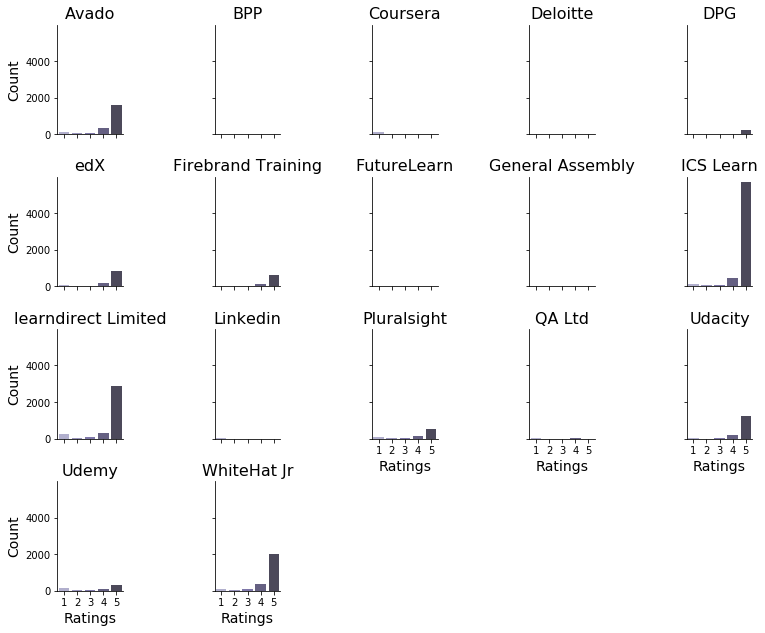

In [9]:
# Ratings by company
pal = sns.color_palette("Purples_d", 5)

g = sns.FacetGrid(df, # initialise FacetGrid, this will not draw the plots
                  col="itemReviewed_name", 
                  height=2.2, 
                  aspect=1, 
                  col_wrap=5,
                  margin_titles=True
                 ) 
g.map(sns.countplot, "reviewRating_ratingValue", palette=pal) # Draw the plot using map function
g.set_axis_labels("Ratings", "Count", fontsize=14)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=16)

Text(0.5, 0, 'Total (Head+Body) Words Count')

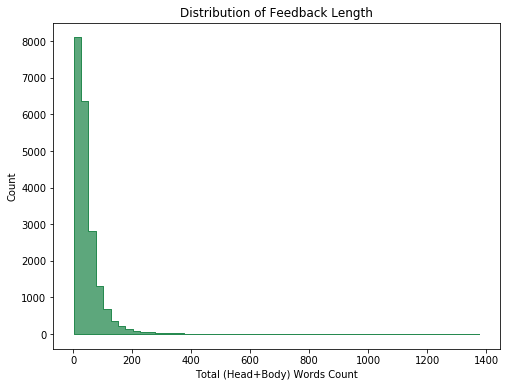

In [10]:
# Total (Head + Body) length by words
df['head_word_count'] = df['headline'].apply(lambda x: len(str(x).split()))
df['body_word_count'] = df['reviewBody'].apply(lambda x: len(str(x).split()))
df['total_word_count'] = df['head_word_count'] + df['body_word_count']

f, ax = plt.subplots(figsize=(8,6))

pal = sns.color_palette("Greens_d")
pal.reverse()

sns.histplot(data=df, 
             x="total_word_count",
             stat="count", # 'count', 'frequency', 'density', 'probability'
             bins=20, # number of bins
             binwidth=25, # width of each bins. Override bins parameter
             element='step', # 'bars', 'step', 'poly'. Univariate only
             #palette="dark", # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
             #legend=True, # True or False
             color='#278a50',
             ax=ax
            )

ax.set_title('Distribution of Feedback Length')
ax.set_ylabel('Count')
ax.set_xlabel('Total (Head+Body) Words Count')

Text(0.5, 0, 'Ratings')

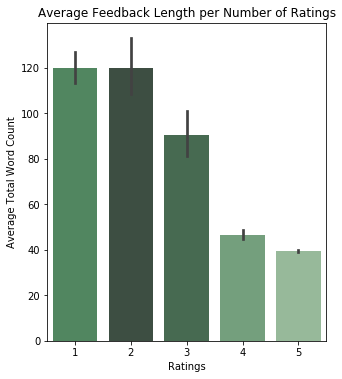

In [11]:
# Average Total (Head + Body) length by ratings
f, ax = plt.subplots(figsize=(5,5.85))

groupedvalues=df.groupby('reviewRating_ratingValue').count().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["Unnamed: 0"].argsort().argsort() 

sns.barplot(data=df,
                   x="reviewRating_ratingValue", 
                   y="total_word_count", 
                   saturation=0.5, # float 0 to 1. Large patches often look better with slightly desaturated colors.
                   orient=None, # 'v' or 'h'. Use to resolve ambiguity
                   palette=np.array(pal[::-1])[rank], # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
                   ax=ax
                  )

ax.set_title('Average Feedback Length per Number of Ratings')
ax.set_ylabel('Average Total Word Count')
ax.set_xlabel('Ratings')

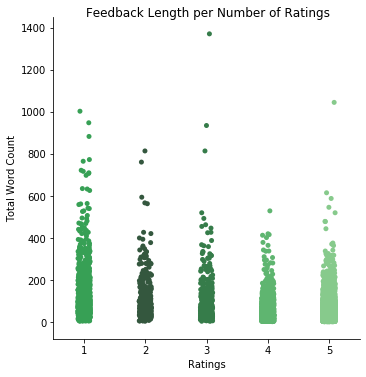

In [12]:
# Total (Head + Body) length by ratings

groupedvalues=df.groupby('reviewRating_ratingValue').count().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["Unnamed: 0"].argsort().argsort() 

g = sns.catplot(data=df,
                   x="reviewRating_ratingValue", 
                   y="total_word_count", 
                   kind="strip", # 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', 'bar', or 'count'
                   height=5, # height in inches for each facet
                   aspect=1, # ratio of facet. Width = height * aspect
                   palette=np.array(pal[::-1])[rank] # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
                  )


g.fig.suptitle("Feedback Length per Number of Ratings", x=0.55, y=1)
plt.subplots_adjust(top=0.97)
g.set_axis_labels("Ratings", "Total Word Count")

[Text(0, 0.5, 'Ratings Value'),
 Text(0, 1.5, 'Head Length'),
 Text(0, 2.5, 'Body Length'),
 Text(0, 3.5, 'Total Length')]

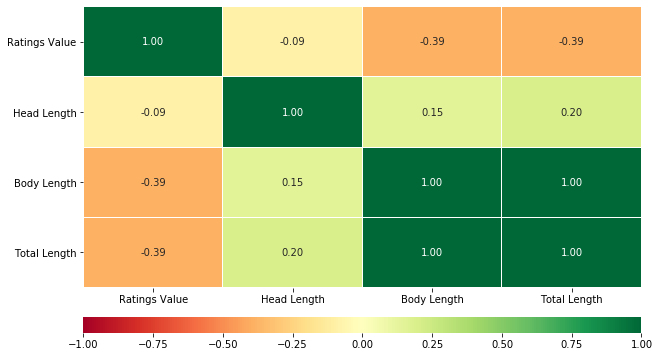

In [13]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .2} # set ratio of axes grid
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(10,6))

df_sliced = df[["reviewRating_ratingValue", "head_word_count", "body_word_count", "total_word_count"]]
df_sliced.columns = ['Ratings Value', 'Head Length', 'Body Length', 'Total Length']
g=sns.heatmap(data=df_sliced.corr(),
            vmin=-1, # min value of colormap
            vmax=1, # max value of colormap
            annot=True, # If True, write data value in each cell
            fmt=".2f", # String formatting code for annotation
            linewidths=0.1, # Width of the lines that will divide each cell
            linecolor="White", # Color of the lines that will divide each cell
            cmap="RdYlGn", # The mapping from data values to color space
            cbar=True, # Whether to draw a color bar
            cbar_ax=cbar_ax, # Which axis to draw the colorbar, if not set, draw in main axis
            cbar_kws={"orientation": "horizontal"},
            ax=ax
           )
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

Suggestion: need to wait for sentiment classification and see the correlation with the sentiment value as well.

### 1.3. Verify Data Quality

List the results of the data quality verification; if quality problems exist, list possible solutions. Solutions
to data quality problems generally depend heavily on both data and business knowledge.

In [14]:
# Missing Values: return a dataframe with number of missing values for each feature and its percentage
def check_missing_value(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values_table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    pd.set_option('display.max_rows', None)

    return missing_values_table

In [15]:
check_missing_value(df)

,Total,Percent
author_image,17629,86.501472
author_name,1,0.004907
total_word_count,0,0.000000
body_word_count,0,0.000000
@type,0,0.000000
datePublished,0,0.000000
headline,0,0.000000
inLanguage,0,0.000000
reviewBody,0,0.000000
author_@type,0,0.000000


Th missing values in author image and name can be ignored as this project will not use both features.

In [16]:
#Check input errors
np.sort(df['reviewRating_ratingValue'].unique())

array([1, 2, 3, 4, 5], dtype=int64)

It is confirmed that the ratings value between 1 and 5 only, inclusive.

Now, manually check if there's any discrepancies in the head/body of feedback. It seems that the headline is automatically filled with several words from the body if the reviewer did not fill in manually. One characteristic of these kind of feedback head is the symbol … attached at the end of the head. There some seemingly random feedback such as 'Xggv', emoticons such as ':)', shorten word such as 'Fab' from fabulous, typos such as 'consise' (should be 'concise').

## 2. Data Preparation

### 2.1. Data Selection

In [17]:
df.drop(['Unnamed: 0', '@type', 'inLanguage', 'author_@type', 'author_name', 'author_url', 'author_image', 
         'itemReviewed_@type', 'publisher_@type', 'publisher_name', 'publisher_sameAs',
         'reviewRating_@type'], axis=1, inplace=True)

The selected columns are chosen simply because they are needed for the project. 'headline', 'reviewBody', and 'reviewRating_ratingValue' make the whole feedback structure. 'itemReviewed_name' is needed to give comparison for business insights purpose. 'datePublished' is also included for indexing/sorting purpose. The excluded columns might be useful, but they can be explored further as a future work direction.

In [18]:
df.head()

,datePublished,headline,reviewBody,itemReviewed_name,reviewRating_ratingValue,head_word_count,body_word_count,total_word_count
0,2021-06-15T02:22:01+00:00,Thanks again to Andre for your prompt…,Thanks again to Andre for your prompt follow-u...,Avado,4,7,10,17
1,2021-06-07T20:17:54+00:00,Very disappointed,"Very disappointed, I planned on taking this to...",Avado,1,2,122,124
2,2021-06-02T15:37:44+00:00,Great customer care!,Great customer care!,Avado,5,3,3,6
3,2021-06-01T16:16:19+00:00,Very helpful with queries and issues,Very helpful with queries and issues. The res...,Avado,5,6,41,47
4,2021-06-01T09:16:57+00:00,about amending system error,Dear Mr. Andre\nThank you very much settle for...,Avado,5,4,13,17


## 2.2. Data Cleaning

In [19]:
# remove unwanted characters, numbers and symbols
df['headline_clean'] = df['headline'].apply(lambda text: " ".join(re.findall("[a-zA-Z]+", text)))
df['reviewBody_clean'] = df['reviewBody'].apply(lambda text: " ".join(re.findall("[a-zA-Z]+", text)))

# make entire text lowercase
df['headline_clean'] = [r.lower() for r in df['headline_clean']]
df['reviewBody_clean'] = [r.lower() for r in df['reviewBody_clean']]

stop_words = stopwords.words('english')

def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
df['headline_clean'] = [remove_stopwords(r.split()) for r in df['headline_clean']]
df['reviewBody_clean'] = [remove_stopwords(r.split()) for r in df['reviewBody_clean']]

In [20]:
df['reviewBody_clean'].iloc[1]

'disappointed planned taking get cipd lol hr since recently changed profession job told hope transferring hr cancel everything still within days allowance tried numerous times reach avado recent discussion student support cancel get refund since still month st course starts within days days one replying helping expect someone even complete enrollment even respond within days totally unacceptable'

In [21]:
df['reviewBody_clean'].iloc[10]

'absolutely fantastic experince great cohort amazing support mentor student success team completed within deadlines actually perfectly worked learning style brilliant vle content'

In [22]:
# Lemmatize the words in the feedback based on the pos tag
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        pos = pos_tag([i.strip()])
        word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
        final_text.append(word)
    return " ".join(final_text)

df['lemmatized_headline'] = df['headline_clean'].apply(lemmatize_words)
df['lemmatized_reviewBody'] = df['reviewBody_clean'].apply(lemmatize_words) # without punctuation marks & stopwords
df['lemmatized_reviewBody_original'] = df['reviewBody'].apply(lemmatize_words) # still with punctuation marks & stopwords

In [23]:
df['lemmatized_reviewBody'].iloc[1]

'disappointed plan take get cipd lol hr since recently change profession job told hope transfer hr cancel everything still within day allowance try numerous time reach avado recent discussion student support cancel get refund since still month st course start within day day one reply help expect someone even complete enrollment even respond within day totally unacceptable'

In [24]:
df['lemmatized_reviewBody'].iloc[10]

'absolutely fantastic experince great cohort amaze support mentor student success team complete within deadline actually perfectly work learn style brilliant vle content'

In [25]:
df['lemmatized_reviewBody_original'].iloc[10]

"I absolutely have a fantastic experince. Great cohort, amaze support from our mentor and student success team. I've complete all within the deadline which be actually what perfectly work for my learn style. Brilliant VLE and the content."

### 2.3. Data Construction

In [26]:
# word count
df['head_word_count'] = df['headline'].apply(lambda x: len(str(x).split()))
df['body_word_count'] = df['reviewBody'].apply(lambda x: len(str(x).split()))
df['total_word_count'] = df['head_word_count'] + df['body_word_count']

# combine head and body
df['lemmatized_feedback'] = df['lemmatized_headline'] + ' ' + df['lemmatized_reviewBody']

# convert rating to binary class
def sentiment_rating(rating):
    # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1

df['overall_rating'] = df['reviewRating_ratingValue'].apply(sentiment_rating) 

In [27]:
df.head()

,datePublished,headline,reviewBody,itemReviewed_name,reviewRating_ratingValue,head_word_count,body_word_count,total_word_count,headline_clean,reviewBody_clean,lemmatized_headline,lemmatized_reviewBody,lemmatized_reviewBody_original,lemmatized_feedback,overall_rating
0,2021-06-15T02:22:01+00:00,Thanks again to Andre for your prompt…,Thanks again to Andre for your prompt follow-u...,Avado,4,7,10,17,thanks andre prompt,thanks andre prompt follow response,thanks andre prompt,thanks andre prompt follow response,Thanks again to Andre for your prompt follow-u...,thanks andre prompt thanks andre prompt follow...,1
1,2021-06-07T20:17:54+00:00,Very disappointed,"Very disappointed, I planned on taking this to...",Avado,1,2,122,124,disappointed,disappointed planned taking get cipd lol hr si...,disappointed,disappointed plan take get cipd lol hr since r...,"Very disappointed, I plan on take this to get ...",disappointed disappointed plan take get cipd l...,0
2,2021-06-02T15:37:44+00:00,Great customer care!,Great customer care!,Avado,5,3,3,6,great customer care,great customer care,great customer care,great customer care,Great customer care!,great customer care great customer care,1
3,2021-06-01T16:16:19+00:00,Very helpful with queries and issues,Very helpful with queries and issues. The res...,Avado,5,6,41,47,helpful queries issues,helpful queries issues response time february ...,helpful query issue,helpful query issue response time february sta...,Very helpful with query and issues. The respon...,helpful query issue helpful query issue respon...,1
4,2021-06-01T09:16:57+00:00,about amending system error,Dear Mr. Andre\nThank you very much settle for...,Avado,5,4,13,17,amending system error,dear mr andre thank much settle system error soon,amend system error,dear mr andre thank much settle system error soon,Dear Mr. Andre Thank you very much settle for ...,amend system error dear mr andre thank much se...,1


### 2. Final Dataset

In [28]:
df.to_csv('../Dataset/trustpilot_reviews.csv', index=False)